In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
print(df.columns)

pd.set_option('mode.chained_assignment', None)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import scale

func_dict = {
    'Typ':7,
    'Min1':6,
    'Min2':5,
    'Mod':4,
    'Maj1':3,
    'Maj2':2,
    'Sev':1,
    'Sal':0  
}

df['FuncScore'] = df['Functional'].map(lambda x: func_dict[x])

quality_dict = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1, 
    'No':0
}


# Features ending in 'Score' have been converted from strings to ordered integers
df['KitchenQualScore'] = df['KitchenQual'].map(lambda x: quality_dict[x])

df.loc[df['BsmtQual'].isnull(),'BsmtQual'] = "No"
df['BsmtQualScore'] = df['BsmtQual'].map(lambda x: quality_dict[x])
df.loc[df['BsmtCond'].isnull(),'BsmtCond'] = "No"
df['BsmtCondScore'] = df['BsmtCond'].map(lambda x: quality_dict[x])
df.loc[df['ExterQual'].isnull(),'ExterQual'] = "No"
df['ExterQualScore'] = df['ExterQual'].map(lambda x: quality_dict[x])
df.loc[df['ExterCond'].isnull(),'ExterCond'] = "No"
df['ExterCondScore'] = df['ExterCond'].map(lambda x: quality_dict[x])

# Features with yes/ no categories were changed to 1 and 0 respectively
df['CentralAirScore'] = df['CentralAir'].map(lambda x: 1 if x.title().strip() == 'Y' else 0)

In [3]:
features_of_interest = [
    '1stFlrSF',
    '2ndFlrSF',
    'TotalBsmtSF',
    'OverallQual',
    'OverallCond',
    'FuncScore',
    'TotRmsAbvGrd',
    'BedroomAbvGr',
    'LotArea',
    'GarageArea',
    'KitchenQualScore',
    'BsmtQualScore',
    'BsmtCondScore',
    'CentralAirScore',
    'FullBath',
    'BsmtFullBath',
    'BsmtHalfBath',
    'HalfBath',
    'ExterQualScore',
    'ExterCondScore',
    'SalePrice',
    
    'RoofStyle', 
    'RoofMatl', 
    'Exterior1st', 
    'Exterior2nd', 
    'MasVnrType', 
    'Foundation', 
    'GarageType',
    'MiscFeature',
    'SaleType',
    #'SaleCondition',
    'MSSubClass',
    'MSZoning',
    'Street',
    'Alley',
    'LandContour',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle'
]

df_foi = df[features_of_interest]

In [4]:
for feature in features_of_interest:
    print(f"Number of null values for {feature}:", df_foi.loc[df_foi[feature].isnull(), feature].count())
    

Number of null values for 1stFlrSF: 0
Number of null values for 2ndFlrSF: 0
Number of null values for TotalBsmtSF: 0
Number of null values for OverallQual: 0
Number of null values for OverallCond: 0
Number of null values for FuncScore: 0
Number of null values for TotRmsAbvGrd: 0
Number of null values for BedroomAbvGr: 0
Number of null values for LotArea: 0
Number of null values for GarageArea: 0
Number of null values for KitchenQualScore: 0
Number of null values for BsmtQualScore: 0
Number of null values for BsmtCondScore: 0
Number of null values for CentralAirScore: 0
Number of null values for FullBath: 0
Number of null values for BsmtFullBath: 0
Number of null values for BsmtHalfBath: 0
Number of null values for HalfBath: 0
Number of null values for ExterQualScore: 0
Number of null values for ExterCondScore: 0
Number of null values for SalePrice: 0
Number of null values for RoofStyle: 0
Number of null values for RoofMatl: 0
Number of null values for Exterior1st: 0
Number of null valu

In [5]:
category_features_to_dummies = [
    'RoofStyle', 
    'RoofMatl', 
    'Exterior1st', 
    'Exterior2nd', 
    'MasVnrType', 
    'Foundation', 
    'GarageType',
    'MiscFeature',
    'SaleType',
    #'SaleCondition',
    'MSSubClass',
    'MSZoning',
    'Street',
    'Alley',
    'LandContour',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle'
]

for feature in category_features_to_dummies:
    temp_df = pd.get_dummies(df_foi[feature], prefix=feature, prefix_sep='_')
    df_foi = df_foi.join(temp_df)
    df_foi.drop(columns=feature, inplace=True)
    

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

continuous_features = [
    '1stFlrSF',
    '2ndFlrSF',
    'TotalBsmtSF',
    'OverallQual',
    'OverallCond',
    'FuncScore',
    'TotRmsAbvGrd',
    'BedroomAbvGr',
    'LotArea',
    'GarageArea',
    'KitchenQualScore',
    'BsmtQualScore',
    'BsmtCondScore',
    'CentralAirScore',
    'FullBath',
    'BsmtFullBath',
    'BsmtHalfBath',
    'HalfBath',
    'ExterQualScore',
    'ExterCondScore',
    'SalePrice'
]

scaler = preprocessing.StandardScaler()
for feature in continuous_features:
    df_foi[feature] = scaler.fit_transform(df_foi[feature].values.reshape(-1,1))
    

In [7]:
def prepare_y(df):
    df.loc[df['SaleCondition'] == 'Normal', 'SaleCondition'] = 0
    df.loc[df['SaleCondition'] != 0, 'SaleCondition'] = 1
    return df['SaleCondition']

In [8]:
X = df_foi
y = prepare_y(df)
y = y.astype('int')


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model_lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

print('Logistical Regression - Imbalanced Precision: %.3f' % precision_score(y_test, y_pred))
print('Logistical Regression - Imbalanced Recall: %.3f' % recall_score(y_test, y_pred))
print('Logistical Regression - Imbalanced Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Logistical Regression - Imbalanced F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores = pd.DataFrame(columns=['Model', 'Accuracy', 'F1_Score'])
model_scores.loc[len(model_scores.index)] = [
    'Logistical Regression - Imbalanced', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]


Logistical Regression - Imbalanced Precision: 0.805
Logistical Regression - Imbalanced Recall: 0.524
Logistical Regression - Imbalanced Accuracy: 0.870
Logistical Regression - Imbalanced F1 Score: 0.635


/Users/ronp/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# import sys
# !{sys.executable} -m pip install imblearn

In [11]:
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model_lr_u = LogisticRegression()
model_lr_u.fit(X_train_rus, y_train_rus)
y_pred = model_lr_u.predict(X_test)

print('Logistical Regression - Undersampling Precision: %.3f' % precision_score(y_test, y_pred))
print('Logistical Regression - Undersampling Recall: %.3f' % recall_score(y_test, y_pred))
print('Logistical Regression - Undersampling Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Logistical Regression - Undersampling F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Logistical Regression - Undersampling', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]


Logistical Regression - Undersampling Precision: 0.512
Logistical Regression - Undersampling Recall: 0.683
Logistical Regression - Undersampling Accuracy: 0.791
Logistical Regression - Undersampling F1 Score: 0.585


In [12]:
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

model_lr_o = LogisticRegression()
model_lr_o.fit(X_train_ros, y_train_ros)
y_pred = model_lr_o.predict(X_test)

print('Logistical Regression - Oversampling Precision: %.3f' % precision_score(y_test, y_pred))
print('Logistical Regression - Oversampling Recall: %.3f' % recall_score(y_test, y_pred))
print('Logistical Regression - Oversampling Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Logistical Regression - Oversampling F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Logistical Regression - Oversampling', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]


Logistical Regression - Oversampling Precision: 0.580
Logistical Regression - Oversampling Recall: 0.635
Logistical Regression - Oversampling Accuracy: 0.822
Logistical Regression - Oversampling F1 Score: 0.606


/Users/ronp/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
count = y.value_counts()
i_r = count[1]/count[0] # initial_ratio of minority to majority class
i_r

0.21869782971619364

In [14]:
# best_accuracy_score = 0
# best_f1_score = 0
# best_min_samp_ratio = 0

# for x in range(0,500):
#     if ((1+x/100)*i_r) <= 1:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#         rus_weighted = RandomUnderSampler(random_state=0, sampling_strategy=(1+x/100)*i_r)
#         X_train_rus, y_train_rus = rus_weighted.fit_resample(X_train, y_train)

#         model_lr_u = LogisticRegression(max_iter=500)
#         model_lr_u.fit(X_train_rus, y_train_rus)
#         y_pred = model_lr_u.predict(X_test)

#         current_accuracy_score = accuracy_score(y_test, y_pred)
#         current_f1_score = f1_score(y_test, y_pred)
#         current_min_samp_ratio = (1+x/100)*i_r

#         if (current_accuracy_score*current_f1_score > best_accuracy_score*best_f1_score):
#             best_accuracy_score = current_accuracy_score
#             best_f1_score = current_f1_score
#             best_min_samp_ratio = current_min_samp_ratio
        
# print('When undersampling, the optimum minority class ratio: %.2f' % best_min_samp_ratio)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rus_weighted = RandomUnderSampler(random_state=0, sampling_strategy=0.47)
X_train_rus, y_train_rus = rus_weighted.fit_resample(X_train, y_train)

model_lr_u = LogisticRegression(max_iter=500)
model_lr_u.fit(X_train_rus, y_train_rus)
y_pred = model_lr_u.predict(X_test)

print('Logistical Regression - Undersampling, weighted Precision: %.3f' % precision_score(y_test, y_pred))
print('Logistical Regression - Undersampling, weighted Recall: %.3f' % recall_score(y_test, y_pred))
print('Logistical Regression - Undersampling, weighted Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Logistical Regression - Undersampling, weighted F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Logistical Regression - Undersampling, weighted', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Logistical Regression - Undersampling, weighted Precision: 0.717
Logistical Regression - Undersampling, weighted Recall: 0.603
Logistical Regression - Undersampling, weighted Accuracy: 0.863
Logistical Regression - Undersampling, weighted F1 Score: 0.655


In [16]:
# best_accuracy_score = 0
# best_f1_score = 0
# best_min_samp_ratio = 0

# for x in range(0,500):
#     if ((1+x/100)*i_r) <= 1:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#         ros_weighted = RandomOverSampler(random_state=0, sampling_strategy=(1+x/100)*i_r)
#         X_train_ros, y_train_ros = ros_weighted.fit_resample(X_train, y_train)

#         model_lr_o = LogisticRegression(max_iter=500)
#         model_lr_o.fit(X_train_ros, y_train_ros)
#         y_pred = model_lr_o.predict(X_test)

#         current_accuracy_score = accuracy_score(y_test, y_pred)
#         current_f1_score = f1_score(y_test, y_pred)
#         current_min_samp_ratio = (1+x/100)*i_r

#         if (current_accuracy_score*current_f1_score > best_accuracy_score*best_f1_score):
#             best_accuracy_score = current_accuracy_score
#             best_f1_score = current_f1_score
#             best_min_samp_ratio = current_min_samp_ratio
        
# print('When oversampling, the optimum minority class ratio: %.2f' % best_min_samp_ratio)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ros_weighted = RandomOverSampler(random_state=0, sampling_strategy=.32)
X_train_ros, y_train_ros = ros_weighted.fit_resample(X_train, y_train)

model_lr_o = LogisticRegression(max_iter=500)
model_lr_o.fit(X_train_ros, y_train_ros)
y_pred = model_lr_o.predict(X_test)

print('Logistical Regression - Oversampling, weighted Precision: %.3f' % precision_score(y_test, y_pred))
print('Logistical Regression - Oversampling, weighted Recall: %.3f' % recall_score(y_test, y_pred))
print('Logistical Regression - Oversampling, weighted Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Logistical Regression - Oversampling, weighted F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Logistical Regression - Oversampling, weighted', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Logistical Regression - Oversampling, weighted Precision: 0.761
Logistical Regression - Oversampling, weighted Recall: 0.556
Logistical Regression - Oversampling, weighted Accuracy: 0.866
Logistical Regression - Oversampling, weighted F1 Score: 0.642


In [18]:
# from sklearn.ensemble import RandomForestClassifier

# best_accuracy_score = 0
# best_f1_score = 0
# best_n_estimator = 0

# for x in range(1,100):

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#     rfc = RandomForestClassifier(n_estimators=x, random_state=0)
#     rfc.fit(X_train, y_train)
#     y_pred = rfc.predict(X_test)
    
#     current_accuracy_score = accuracy_score(y_test, y_pred)
#     current_f1_score = f1_score(y_test, y_pred)

#     if (current_accuracy_score*current_f1_score > best_accuracy_score*best_f1_score):
#         best_accuracy_score = current_accuracy_score
#         best_f1_score = current_f1_score
#         best_n_estimator = x
        
# print('When imbalanced, the optimum number of estimators is', best_n_estimator)

In [19]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Random Forest Classifier - Imbalanced Precision: %.3f' % precision_score(y_test, y_pred))
print('Random Forest Classifier - Imbalanced Recall: %.3f' % recall_score(y_test, y_pred))
print('Random Forest Classifier - Imbalanced Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Random Forest Classifier - Imbalanced F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Random Forest Classifier - Imbalanced', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Random Forest Classifier - Imbalanced Precision: 0.967
Random Forest Classifier - Imbalanced Recall: 0.460
Random Forest Classifier - Imbalanced Accuracy: 0.880
Random Forest Classifier - Imbalanced F1 Score: 0.624


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

rfc_u = RandomForestClassifier(n_estimators=10, random_state=0)
rfc_u.fit(X_train_rus, y_train_rus)
y_pred = rfc_u.predict(X_test)

print('Random Forest Classifier - Undersampling Precision: %.3f' % precision_score(y_test, y_pred))
print('Random Forest Classifier - Undersampling Recall: %.3f' % recall_score(y_test, y_pred))
print('Random Forest Classifier - Undersampling Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Random Forest Classifier - Undersampling F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Random Forest Classifier - Undersampling', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Random Forest Classifier - Undersampling Precision: 0.528
Random Forest Classifier - Undersampling Recall: 0.603
Random Forest Classifier - Undersampling Accuracy: 0.798
Random Forest Classifier - Undersampling F1 Score: 0.563


In [21]:
# best_accuracy_score = 0
# best_f1_score = 0
# best_min_samp_ratio = 0

# for x in range(100,550):
#     if ((x/100)*i_r) <= 1:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#         rus_weighted = RandomUnderSampler(random_state=0, sampling_strategy=(x/100)*i_r)
#         X_train_rus, y_train_rus = rus_weighted.fit_resample(X_train, y_train)

#         rfc_u = RandomForestClassifier(n_estimators=10, random_state=0)
#         rfc_u.fit(X_train_rus, y_train_rus)
#         y_pred = rfc_u.predict(X_test)

#         current_accuracy_score = accuracy_score(y_test, y_pred)
#         current_f1_score = f1_score(y_test, y_pred)
#         current_min_samp_ratio = (x/100)*i_r

#         if (current_accuracy_score*current_f1_score > best_accuracy_score*best_f1_score):
#             best_accuracy_score = current_accuracy_score
#             best_f1_score = current_f1_score
#             best_min_samp_ratio = current_min_samp_ratio

# print('When undersampling, the optimum minority class ratio: %.2f' % best_min_samp_ratio)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rus = RandomUnderSampler(random_state=0, sampling_strategy=0.44)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

rfc_u = RandomForestClassifier(n_estimators=10, random_state=0)
rfc_u.fit(X_train_rus, y_train_rus)
y_pred = rfc_u.predict(X_test)

print('Random Forest Classifier - Undersampling, weighted Precision: %.3f' % precision_score(y_test, y_pred))
print('Random Forest Classifier - Undersampling, weighted Recall: %.3f' % recall_score(y_test, y_pred))
print('Random Forest Classifier - Undersampling, weighted Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Random Forest Classifier - Undersampling, weighted F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Random Forest Classifier - Undersampling, weighted', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Random Forest Classifier - Undersampling, weighted Precision: 0.821
Random Forest Classifier - Undersampling, weighted Recall: 0.508
Random Forest Classifier - Undersampling, weighted Accuracy: 0.870
Random Forest Classifier - Undersampling, weighted F1 Score: 0.627


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

rfc_o = RandomForestClassifier(n_estimators=10, random_state=0)
rfc_o.fit(X_train_ros, y_train_ros)
y_pred = rfc_o.predict(X_test)

print('Random Forest Classifier - Oversampling Precision: %.3f' % precision_score(y_test, y_pred))
print('Random Forest Classifier - Oversampling Recall: %.3f' % recall_score(y_test, y_pred))
print('Random Forest Classifier - Oversampling Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Random Forest Classifier - Oversampling F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Random Forest Classifier - Oversampling', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Random Forest Classifier - Oversampling Precision: 1.000
Random Forest Classifier - Oversampling Recall: 0.492
Random Forest Classifier - Oversampling Accuracy: 0.890
Random Forest Classifier - Oversampling F1 Score: 0.660


In [24]:
# best_accuracy_score = 0
# best_f1_score = 0
# best_min_samp_ratio = 0

# for x in range(100,550):
#     if ((x/100)*i_r) <= 1:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#         ros_weighted = RandomOverSampler(random_state=0, sampling_strategy=(x/100)*i_r)
#         X_train_ros, y_train_ros = ros_weighted.fit_resample(X_train, y_train)

#         rfc_o = RandomForestClassifier(n_estimators=10, random_state=0)
#         rfc_o.fit(X_train_ros, y_train_ros)
#         y_pred = rfc_o.predict(X_test)

#         current_accuracy_score = accuracy_score(y_test, y_pred)
#         current_f1_score = f1_score(y_test, y_pred)
#         current_min_samp_ratio = (x/100)*i_r

#         if (current_accuracy_score*current_f1_score > best_accuracy_score*best_f1_score):
#             best_accuracy_score = current_accuracy_score
#             best_f1_score = current_f1_score
#             best_min_samp_ratio = current_min_samp_ratio
        
# print('When oversampling, the optimum minority class ratio: %.2f' % best_min_samp_ratio)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ros_weighted = RandomOverSampler(random_state=0, sampling_strategy=0.82)
X_train_ros, y_train_ros = ros_weighted.fit_resample(X_train, y_train)

rfc_o = RandomForestClassifier(n_estimators=7, random_state=0)
rfc_o.fit(X_train_ros, y_train_ros)
y_pred = rfc_o.predict(X_test)

print('Random Forest Classifier - Oversampling, weighted Precision: %.3f' % precision_score(y_test, y_pred))
print('Random Forest Classifier - Oversampling, weighted Recall: %.3f' % recall_score(y_test, y_pred))
print('Random Forest Classifier - Oversampling, weighted Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Random Forest Classifier - Oversampling, weighted F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Random Forest Classifier - Oversampling, weighted', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Random Forest Classifier - Oversampling, weighted Precision: 0.825
Random Forest Classifier - Oversampling, weighted Recall: 0.524
Random Forest Classifier - Oversampling, weighted Accuracy: 0.873
Random Forest Classifier - Oversampling, weighted F1 Score: 0.641


In [26]:
# from sklearn.neural_network import MLPClassifier

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# hid_lay_sizes = []
# for x in range(1, 11):
#     for y in range(1, 11):
#         hid_lay_sizes.append((x,y))
        
# best_accuracy_score = 0
# best_f1_score = 0
# best_hidden_layer_dim = ''


# for dim in hid_lay_sizes:
#     nn = MLPClassifier(max_iter=1100, alpha=0.01, activation="relu", hidden_layer_sizes=dim)
#     nn.fit(X_train_ros, y_train_ros)
#     y_pred = nn.predict(X_test)

#     current_accuracy_score = accuracy_score(y_test, y_pred)
#     current_f1_score = f1_score(y_test, y_pred)
#     current_hidden_layer_dim = dim

#     if (current_accuracy_score*current_f1_score > best_accuracy_score*best_f1_score):
#         best_accuracy_score = current_accuracy_score
#         best_f1_score = current_f1_score
#         best_hidden_layer_dim = current_hidden_layer_dim
        
#     print('Finished ', str(dim), 'with accuracy of', current_accuracy_score, 'and f1 score of')
    
# print('Best hidden layer dimensions: ', best_hidden_layer_dim)

In [27]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

nn = MLPClassifier(max_iter=1100, activation="relu", hidden_layer_sizes=(7,4))
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

print('Neural Network (MLPClassifier) - Imbalanced Precision: %.3f' % precision_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Imbalanced Recall: %.3f' % recall_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Imbalanced Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Imbalanced F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Neural Network (MLPClassifier) - Imbalanced', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Neural Network (MLPClassifier) - Imbalanced Precision: 0.667
Neural Network (MLPClassifier) - Imbalanced Recall: 0.550
Neural Network (MLPClassifier) - Imbalanced Accuracy: 0.901
Neural Network (MLPClassifier) - Imbalanced F1 Score: 0.603


In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

nn = MLPClassifier(max_iter=1100, activation="relu", alpha=0.01, hidden_layer_sizes=(7,4))
nn.fit(X_train_rus, y_train_rus)
y_pred = nn.predict(X_test)

print('Neural Network (MLPClassifier) - Undersampling Precision: %.3f' % precision_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Undersampling Recall: %.3f' % recall_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Undersampling Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Undersampling F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Neural Network (MLPClassifier) - Undersampling', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Neural Network (MLPClassifier) - Undersampling Precision: 0.283
Neural Network (MLPClassifier) - Undersampling Recall: 0.700
Neural Network (MLPClassifier) - Undersampling Accuracy: 0.716
Neural Network (MLPClassifier) - Undersampling F1 Score: 0.403


In [29]:
# best_accuracy_score = 0
# best_f1_score = 0
# best_min_samp_ratio = 0

# for x in range(20,55):
#     if ((x/10)*i_r) <= 1:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#         rus_weighted = RandomUnderSampler(random_state=0, sampling_strategy=(x/10)*i_r)
#         X_train_rus, y_train_rus = rus_weighted.fit_resample(X_train, y_train)

#         nn_u = MLPClassifier(max_iter=1100, alpha=0.01, activation="relu", hidden_layer_sizes=(7,4))
#         nn_u.fit(X_train_rus, y_train_rus)
#         y_pred = nn_u.predict(X_test)

#         current_accuracy_score = accuracy_score(y_test, y_pred)
#         current_f1_score = f1_score(y_test, y_pred)
#         current_min_samp_ratio = (x/10)*i_r

#         if (current_accuracy_score*current_f1_score > best_accuracy_score*best_f1_score):
#             best_accuracy_score = current_accuracy_score
#             best_f1_score = current_f1_score
#             best_min_samp_ratio = current_min_samp_ratio

        
# print('When undersampling, the optimum minority class ratio: %.2f' % best_min_samp_ratio)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rus = RandomUnderSampler(random_state=0, sampling_strategy=0.55)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

nn = MLPClassifier(max_iter=1100, activation="relu", alpha=0.01, hidden_layer_sizes=(7,4))
nn.fit(X_train_rus, y_train_rus)
y_pred = nn.predict(X_test)

print('Neural Network (MLPClassifier) - Undersampling, weighted Precision: %.3f' % precision_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Undersampling, weighted Recall: %.3f' % recall_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Undersampling, weighted Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Undersampling, weighted F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Neural Network (MLPClassifier) - Undersampling, weighted', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Neural Network (MLPClassifier) - Undersampling, weighted Precision: 0.590
Neural Network (MLPClassifier) - Undersampling, weighted Recall: 0.571
Neural Network (MLPClassifier) - Undersampling, weighted Accuracy: 0.822
Neural Network (MLPClassifier) - Undersampling, weighted F1 Score: 0.581


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

nn = MLPClassifier(max_iter=1100, activation="relu", alpha=0.01, hidden_layer_sizes=(7,1))
nn.fit(X_train_ros, y_train_ros)
y_pred = nn.predict(X_test)

print('Neural Network (MLPClassifier) - Oversampling Precision: %.3f' % precision_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Oversampling Recall: %.3f' % recall_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Oversampling Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Oversampling F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Neural Network (MLPClassifier) - Oversampling', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Neural Network (MLPClassifier) - Oversampling Precision: 0.717
Neural Network (MLPClassifier) - Oversampling Recall: 0.524
Neural Network (MLPClassifier) - Oversampling Accuracy: 0.853
Neural Network (MLPClassifier) - Oversampling F1 Score: 0.606


In [32]:
# best_accuracy_score = 0
# best_f1_score = 0
# best_min_samp_ratio = 0


# for x in range(10,55):
#     if ((x/10)*i_r) <= 1:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#         ros_weighted = RandomOverSampler(random_state=0, sampling_strategy=(x/10)*i_r)
#         X_train_ros, y_train_ros = ros_weighted.fit_resample(X_train, y_train)

#         nn_o = MLPClassifier(max_iter=1100, alpha=0.01, activation="relu", hidden_layer_sizes=(7,4))
#         nn_o.fit(X_train_ros, y_train_ros)
#         y_pred = nn_o.predict(X_test)

#         current_accuracy_score = accuracy_score(y_test, y_pred)
#         current_f1_score = f1_score(y_test, y_pred)
#         current_min_samp_ratio = (x/10)*i_r

#         if (current_accuracy_score*current_f1_score > best_accuracy_score*best_f1_score):
#             best_accuracy_score = current_accuracy_score
#             best_f1_score = current_f1_score
#             best_min_samp_ratio = current_min_samp_ratio

        
# print('When oversampling, the optimum minority class ratio: %.2f' % best_min_samp_ratio)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ros_weighted = RandomOverSampler(random_state=0, sampling_strategy=0.83)
X_train_ros, y_train_ros = ros_weighted.fit_resample(X_train, y_train)

nn = MLPClassifier(max_iter=1100, activation="relu", alpha=0.01, hidden_layer_sizes=(7,4))
nn.fit(X_train_ros, y_train_ros)
y_pred = nn.predict(X_test)

print('Neural Network (MLPClassifier) - Oversampling, weighted Precision: %.3f' % precision_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Oversampling, weighted Recall: %.3f' % recall_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Oversampling, weighted Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Neural Network (MLPClassifier) - Oversampling, weighted F1 Score: %.3f' % f1_score(y_test, y_pred))

model_scores.loc[len(model_scores.index)] = [
    'Neural Network (MLPClassifier) - Oversampling, weighted', 
    round(accuracy_score(y_test, y_pred), 4), 
    round(f1_score(y_test, y_pred), 4)
]

Neural Network (MLPClassifier) - Oversampling, weighted Precision: 0.606
Neural Network (MLPClassifier) - Oversampling, weighted Recall: 0.635
Neural Network (MLPClassifier) - Oversampling, weighted Accuracy: 0.832
Neural Network (MLPClassifier) - Oversampling, weighted F1 Score: 0.620


In [34]:
model_scores.sort_values(by=['Accuracy','F1_Score'], ascending=False, inplace=True)
model_scores

,Model,Accuracy,F1_Score
10,Neural Network (MLPClassifier) - Imbalanced,0.9007,0.6027
8,Random Forest Classifier - Oversampling,0.8904,0.6596
5,Random Forest Classifier - Imbalanced,0.8801,0.6237
9,"Random Forest Classifier - Oversampling, weighted",0.8733,0.6408
0,Logistical Regression - Imbalanced,0.8699,0.6346
7,"Random Forest Classifier - Undersampling, weig...",0.8699,0.6275
4,"Logistical Regression - Oversampling, weighted",0.8664,0.6422
3,"Logistical Regression - Undersampling, weighted",0.8630,0.6552
13,Neural Network (MLPClassifier) - Oversampling,0.8527,0.6055
14,"Neural Network (MLPClassifier) - Oversampling,...",0.8322,0.6202


In [35]:
best_models = model_scores.loc[((model_scores['Accuracy']>0.85) & (model_scores['F1_Score']>0.63))]
best_models

,Model,Accuracy,F1_Score
8,Random Forest Classifier - Oversampling,0.8904,0.6596
9,"Random Forest Classifier - Oversampling, weighted",0.8733,0.6408
0,Logistical Regression - Imbalanced,0.8699,0.6346
4,"Logistical Regression - Oversampling, weighted",0.8664,0.6422
3,"Logistical Regression - Undersampling, weighted",0.8630,0.6552


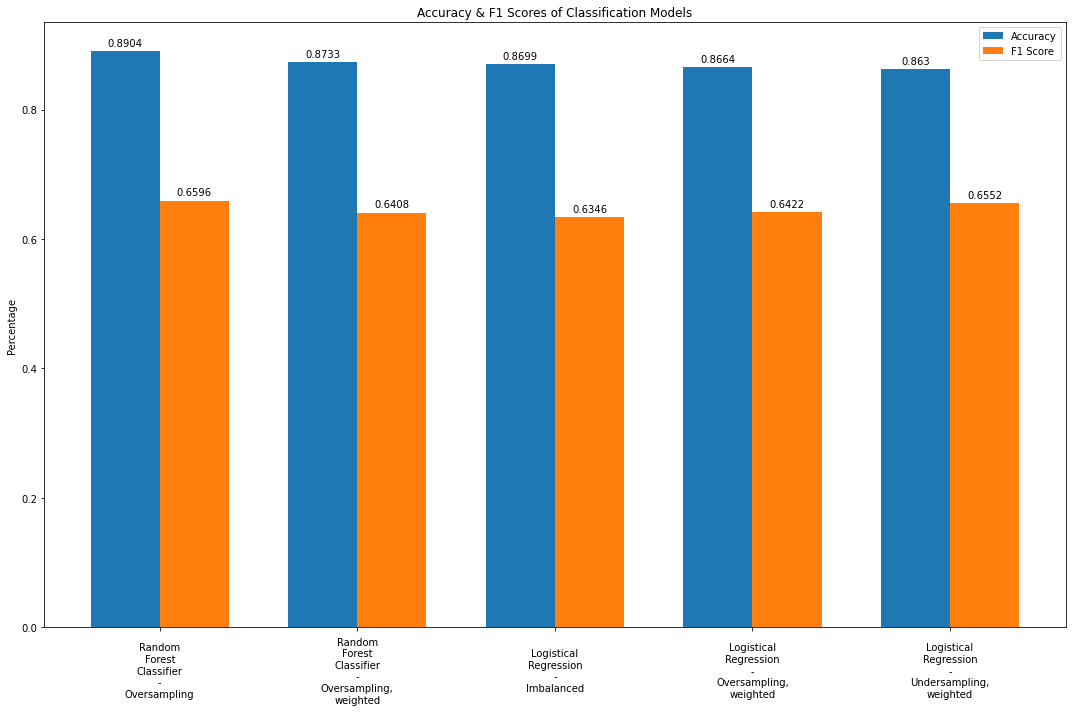

In [36]:
import matplotlib.pyplot as plt


best_models["Model"] = best_models["Model"].map(lambda x: x.replace(' ', '\n'))

model_names = best_models["Model"]
acc_scores = best_models["Accuracy"]
f1_scores = best_models["F1_Score"]


x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
rects1 = ax.bar(x - width/2, acc_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {
    'horizontalalignment':'center',
    'verticalalignment':'center',
    'rotation':'horizontal'
}
ax.set_ylabel('Percentage')
ax.set_title('Accuracy & F1 Scores of Classification Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontdict=font)
ax.tick_params(axis='x', which='major', pad=40)

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


fig.tight_layout()
